<a href="https://colab.research.google.com/github/aivrm/rosy/blob/main/csv_%EB%B8%94%EB%A1%9D%EB%B3%84_%EC%84%B1%EB%B3%84%EC%97%B0%EB%A0%B9%EB%8C%80%EB%B3%84_%EC%B9%B4%EB%93%9C%EC%86%8C%EB%B9%84%ED%8C%A8%ED%84%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



https://dacon.io/competitions/official/235907/codeshare/5393

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [ ]:
BASE_DIR = '/content/drive/MyDrive/_aiffel/_dataton/CrdCnsmptn/csv/'

In [ ]:
df1 = pd.read_csv(BASE_DIR + '블록별 성별연령대별 카드소비패턴.csv', encoding='cp949')

In [ ]:
df1

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5
...,...,...,...,...,...,...,...
495,SS012,201709,11449,F,30대,75450,45
496,SS044,201707,353037,F,30대,118708,25
497,SS054,201901,418149,F,20대,1056300,15
498,SS021,202009,269015,F,70대이상,25150,5


성별(GEDNER), 연령대별(AGE), 카드이용금액계(AMT_CORR), 카드이용건수계(USECT_CORR)

열을 이용하여 자료 분석을 해보겠습니다.

연령대를 분석하기 위하여 데이터프레임의 '연령대별(AGE)' 열을 정수형으로 바꾸겠습니다.

In [ ]:
def change_age(text:str):
    return text[:2]

df1['연령대별(AGE)'] = df1['연령대별(AGE)'].map(change_age).astype(int)
df1

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50,48288,65
1,SS048,201608,156830,M,30,132792,10
2,SS016,202009,32925,M,50,100600,25
3,SS001,201805,214245,F,30,213876,40
4,SS044,201705,279472,M,30,155930,5
...,...,...,...,...,...,...,...
495,SS012,201709,11449,F,30,75450,45
496,SS044,201707,353037,F,30,118708,25
497,SS054,201901,418149,F,20,1056300,15
498,SS021,202009,269015,F,70,25150,5


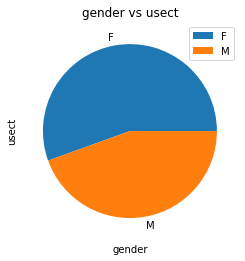

In [ ]:
# 이용 건수

x = df1.groupby(by='성별(GEDNER)').sum().index
y = df1.groupby(by='성별(GEDNER)').sum()['카드이용건수계(USECT_CORR)']
plt.title('gender vs usect')
plt.xlabel('gender')
plt.ylabel('usect')
plt.pie(y, labels=x.values)
plt.legend()
plt.show()

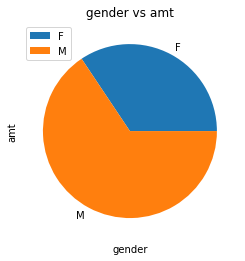

In [ ]:
# 이용 금액

x = df1.groupby(by='성별(GEDNER)').sum().index
y = df1.groupby(by='성별(GEDNER)').sum()['카드이용금액계(AMT_CORR)']
plt.title('gender vs amt')
plt.xlabel('gender')
plt.ylabel('amt')
plt.pie(y, labels=x.values)
plt.legend()
plt.show()

1.2. 연령에 따른 카드이용건수계와 이용금액합계
40,50대가 카드를 제일 많이 이용하지만

카드이용금액은 20대가 가장 많은 것을 알 수 있습니다.

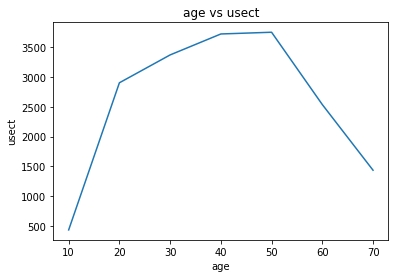

In [ ]:
x = df1.groupby(by='연령대별(AGE)').sum().index
y = df1.groupby(by='연령대별(AGE)').sum()['카드이용건수계(USECT_CORR)']
plt.title('age vs usect')
plt.xlabel('age')
plt.ylabel('usect')
plt.plot(x,y)
plt.show()

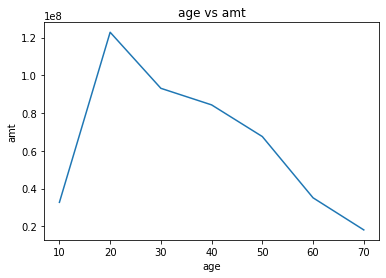

In [ ]:
x = df1.groupby(by='연령대별(AGE)').sum().index
y = df1.groupby(by='연령대별(AGE)').sum()['카드이용금액계(AMT_CORR)']
plt.title('age vs amt')
plt.xlabel('age')
plt.ylabel('amt')
plt.plot(x,y)
plt.show()

* 태블로로 연령대별 카드이용금액 확인해보았습니다. 위에서 확인했듯이 20대의 카드이용금액이 다른 연령대에 비해 앞선 것을 알 수 있었습니다.